In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Exploratory Data Analysis and Preprocessing

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv('C:/Users/Joshu/Desktop/GCU/DSC-580/project/Final House Project_prediction/Home_Price_data.csv')
df.head(5)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  5/2/2014 0:00   313000.0         3       1.50         1340      7912   
1  5/2/2014 0:00  2384000.0         5       2.50         3650      9050   
2  5/2/2014 0:00   342000.0         3       2.00         1930     11947   
3  5/2/2014 0:00   420000.0         3       2.25         2000      8030   
4  5/2/2014 0:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4597 non-null   object 
 1   price          4597 non-null   float64
 2   bedrooms       4597 non-null   int64  
 3   bathrooms      4597 non-null   float64
 4   sqft_living    4597 non-null   int64  
 5   sqft_lot       4597 non-null   int64  
 6   floors         4597 non-null   float64
 7   waterfront     4597 non-null   int64  
 8   view           4597 non-null   int64  
 9   condition      4597 non-null   int64  
 10  sqft_above     4597 non-null   int64  
 11  sqft_basement  4597 non-null   int64  
 12  yr_built       4597 non-null   int64  
 13  yr_renovated   4597 non-null   int64  
 14  street         4597 non-null   object 
 15  city           4597 non-null   object 
 16  statezip       4597 non-null   object 
 17  country        4597 non-null   object 
dtypes: float

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.597000e+03  4597.000000  4597.000000   4597.000000  4.597000e+03   
mean   5.521354e+05     3.401131     2.160811   2139.498804  1.485676e+04   
std    5.639781e+05     0.908848     0.782069    963.260350  3.589573e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.240000e+05     3.000000     1.750000   1460.000000  5.000000e+03   
50%    4.610000e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.550000e+05     4.000000     2.500000   2620.000000  1.100500e+04   
max    2.659000e+07     9.000000     7.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4597.000000  4597.000000  4597.000000  4597.000000  4597.000000   
mean      1.512399     0.007179     0.240809     3.451381  1827.659561   
std       0.538305     0.084431     0.778634     0.677306   862.261719   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count     4597.00000  4597.000000   4597.000000  
mean       312.14814  1970.785730    807.835327  
std        464.18982    29.738818    979.266405  
min          0.00000  1900.000000      0.000000  
25%          0.00000  1951.000000      0.000000  
50%          0.00000  1976.000000      0.000000  
75%        610.00000  1997.000000   1999.000000  
max       4820.00000  2014.000000   2014.000000

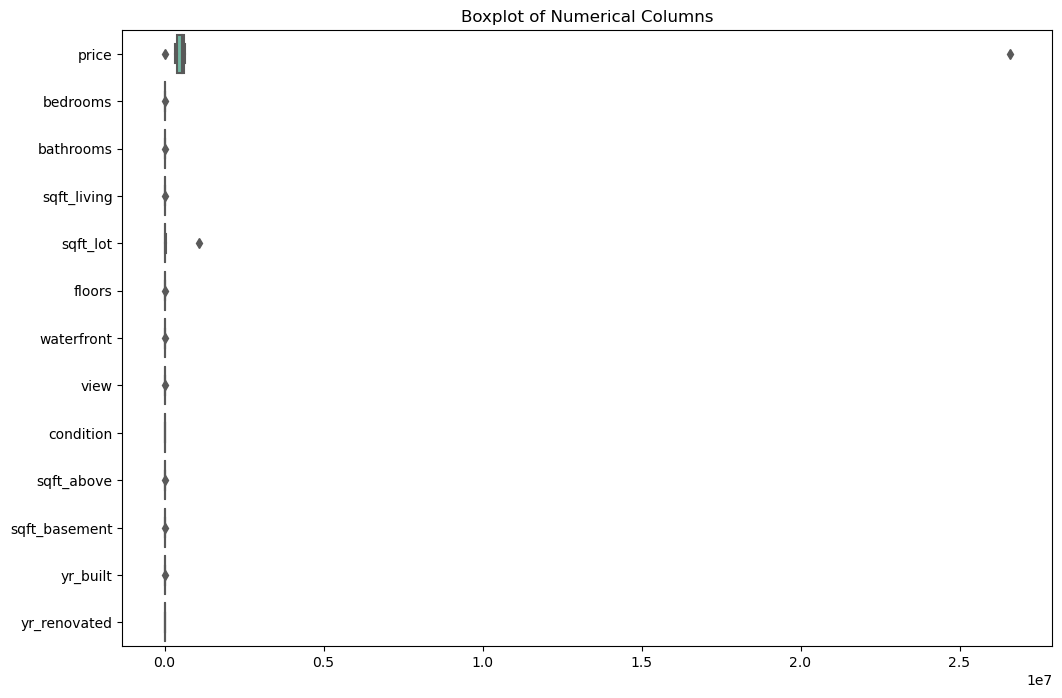

In [8]:
numeric_summary = df.describe().drop('count')

plt.figure(figsize=(12, 8))

sns.boxplot(data=numeric_summary, orient='h', palette='Set2')

plt.title('Boxplot of Numerical Columns')
plt.show()

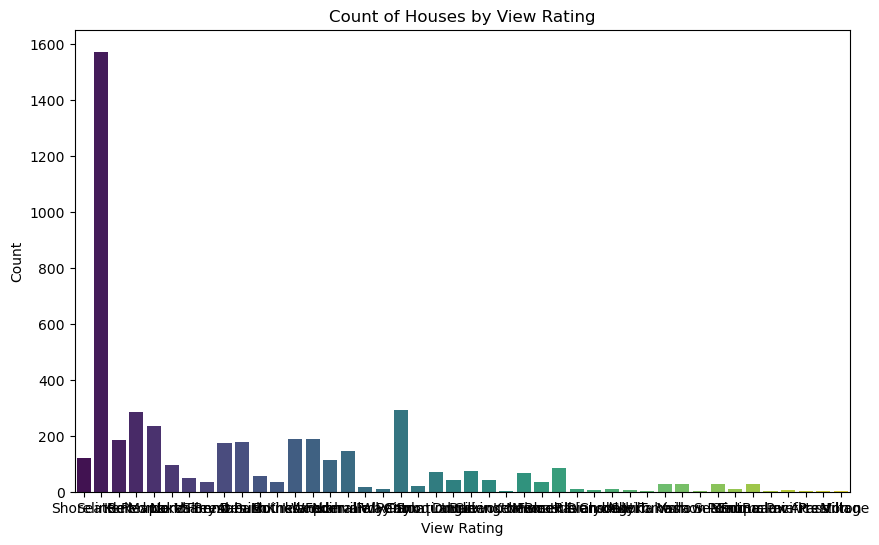

In [9]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='city', palette='viridis')

plt.title('Count of Houses by View Rating')
plt.xlabel('View Rating')
plt.ylabel('Count')

plt.show()

In [10]:
df.shape

(4597, 18)

In [11]:
df['bathrooms'].value_counts()

2.50    1187
1.00     743
1.75     626
2.00     434
2.25     416
1.50     290
2.75     276
3.00     168
3.50     162
3.25     135
3.75      37
4.50      29
4.25      23
4.00      23
0.75      16
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
7.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64

In [12]:
df['bedrooms'].value_counts()

3    2031
4    1530
2     565
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: bedrooms, dtype: int64

In [13]:
df['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             147
Shoreline               122
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               57
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [14]:
df['floors'].value_counts()

1.0    2171
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

In [15]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [16]:
#changing datatype
#df[['floors', 'bathrooms', 'bedrooms']] = df[['floors', 'bathrooms', 'bedrooms']].astype('int64')

In [17]:
(df['price']==0).sum(0)

49

In [18]:
#There are 49 rows where the price of a home is 0 which is not possible

In [19]:
# replacing with nan and filling the nan values with mean, we can use median as well
df['price'].replace(0, np.nan, inplace=True)
df['price'].fillna(value=df['price'].mean(), inplace=True)

In [20]:
#Removing the time value from the date column by changing it to a date format
df['date'] = pd.to_datetime(df['date'])

In [21]:
df.head(3)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0         3        1.5         1340      7912     1.5   
1 2014-05-02  2384000.0         5        2.5         3650      9050     2.0   
2 2014-05-02   342000.0         3        2.0         1930     11947     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA

In [22]:
#Exploratory Data Analysis using Graphs

<BarContainer object of 115 artists>

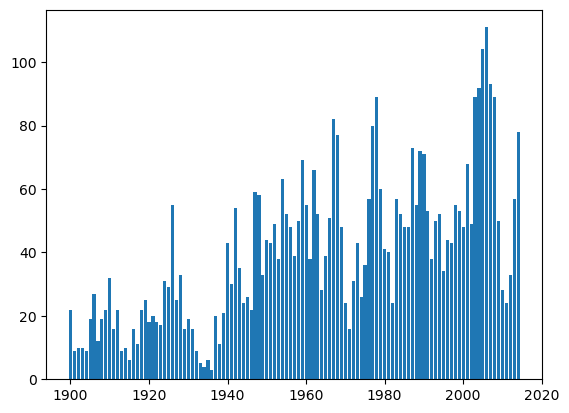

In [23]:
a= df.yr_built.value_counts()
plt.bar(a.index,a.values)

In [24]:
df = df

value_counts = df['yr_built'].value_counts().reset_index()

value_counts.columns = ['yr_built', 'count']

fig = px.bar(value_counts, x='yr_built', y='count', title='Year Built Vs Counts')
fig.show()

In [25]:
#In the above graph we can see the range of how many houses were constructed during each year

<BarContainer object of 60 artists>

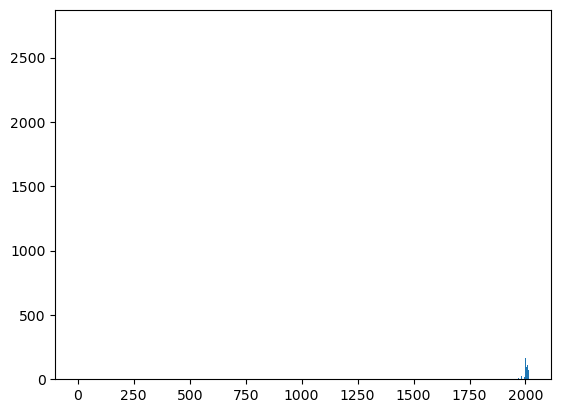

In [26]:
b= df.yr_renovated.value_counts()
plt.bar(b.index,b.values)

In [27]:
#This graph shows that most of the home only got renovated have the year 2000

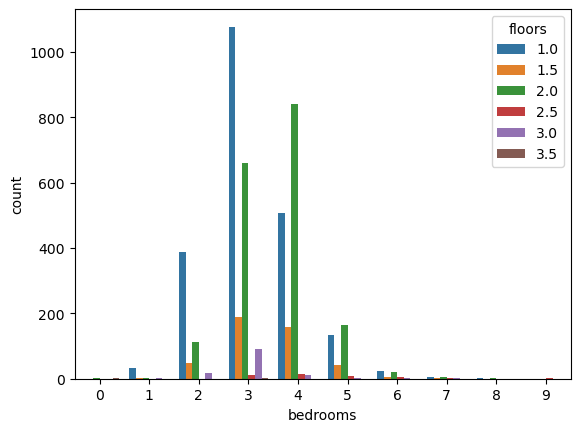

In [28]:
ax = sns.countplot(x="bedrooms",hue="floors", data=df)

In [29]:
#This graph shows us how the bedrooms are distributed in floors. With 3 bedroom in a single floor being the most common build

In [30]:
#Dropping the below features as country is same for all values and street does not help in the analysis
df.drop(columns=['country','street'], inplace=True)

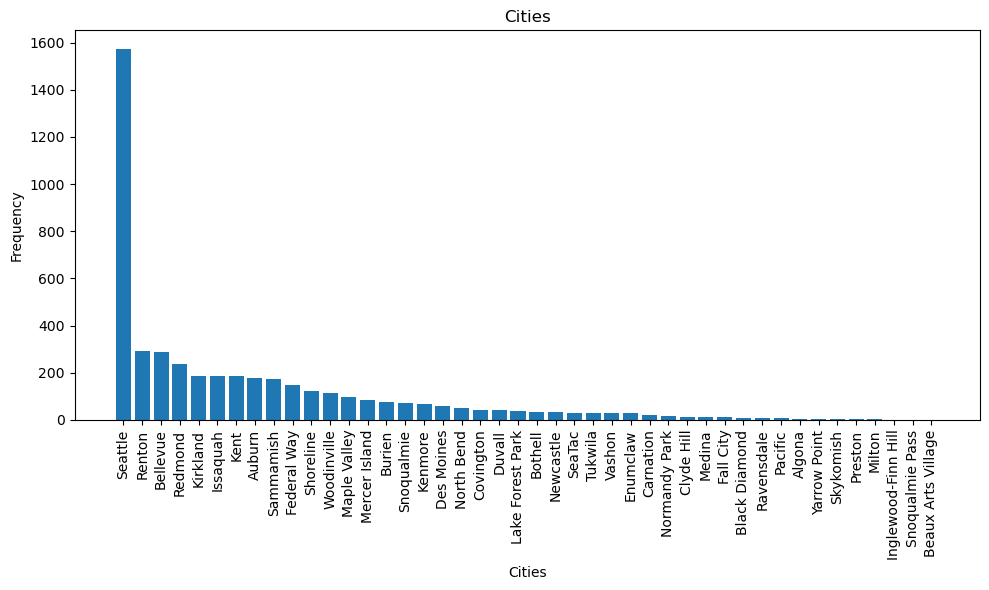

In [31]:
data = df['city'].value_counts()

plt.figure(figsize=(10, 6))  
plt.bar(data.index, data.values)
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.title('Cities')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [32]:
import plotly.express as px

data = df['bedrooms'].value_counts().reset_index()
data.columns = ['bedrooms', 'Frequency']

fig = px.bar(data, x='bedrooms', y='Frequency', title='Bedrooms', labels={'Frequency': 'Frequency'}, text='Frequency')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis=dict(tickangle=45),
    xaxis_title='Bedrooms',
    yaxis_title='Frequency',
    autosize=False,
    width=1000,
    height=500
)

fig.show()

In [33]:
data = df['bedrooms'].value_counts().reset_index()
data.columns = ['bedrooms', 'Frequency']


data = data.sort_values(by='bedrooms')

fig = px.line(data, x='bedrooms', y='Frequency', title='Bedrooms',
              labels={'Frequency': 'Frequency'}, line_shape='linear',
              line_dash_sequence=['solid'], markers=True, color='bedrooms')

fig.update_traces(texttemplate='%{text}', textposition='top center')

fig.update_layout(
    xaxis=dict(tickangle=45),
    xaxis_title='Bedrooms',
    yaxis_title='Frequency',
    autosize=False,
    width=1000,
    height=500
)

fig.show()

In [34]:
#This graph shows the distribution of homes within Washington with Seattle having the most home and Renton and Bellevue being in 
#second

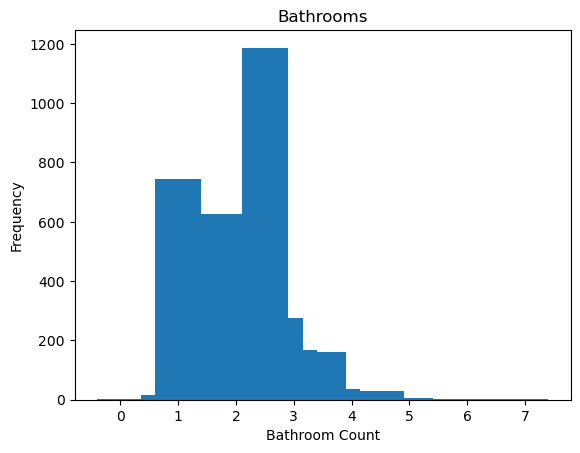

In [35]:
data = df['bathrooms'].value_counts()

plt.bar(data.index, data.values)
plt.xlabel('Bathroom Count')
plt.ylabel('Frequency')
plt.title('Bathrooms')
plt.show()

In [36]:
#The most common bathroon count is 2 bathrooms but there are few homes with bathrooms as 0 as well which could mean they might 
# be an apartment

C:\Users\joshu\AppData\Local\Temp\ipykernel_15508\2931807900.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



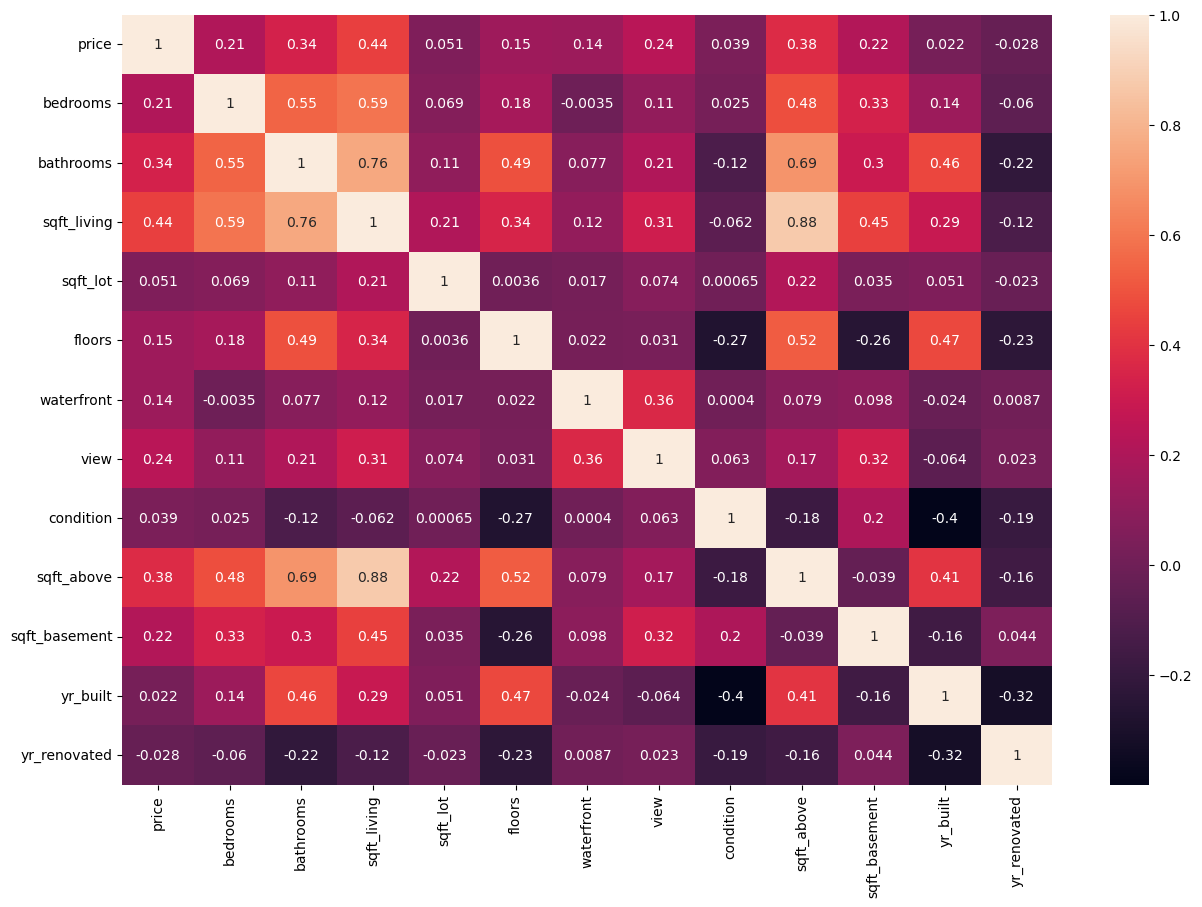

In [37]:
#Heat Map
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation = 0)
plt.show()

In [38]:
#The heatmap shows us that features such as floors and yr-renovated and condition has little correlation
#Features such as bedrooms to bathrooms to squarefeet have higher correlation

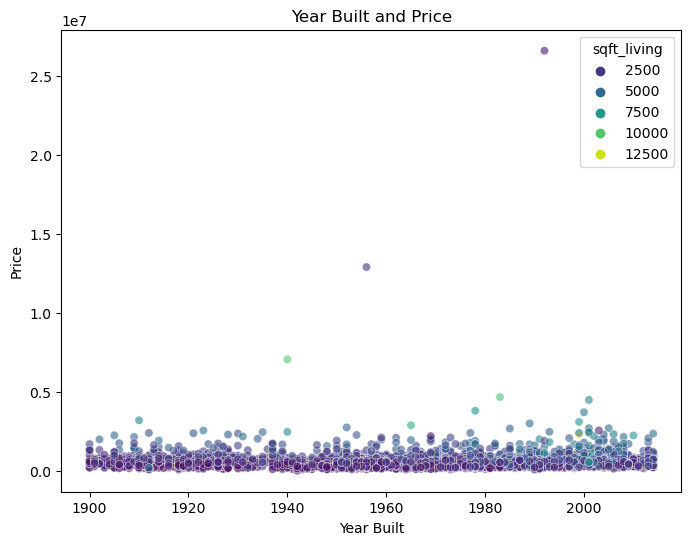

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='yr_built', y='price' , hue='sqft_living', data=df, alpha=0.6, palette='viridis')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Year Built and Price')
plt.show()

In [40]:
#This  graph shows the gradual increase in prices for homes and we can see how more homes are higher priced from 1980

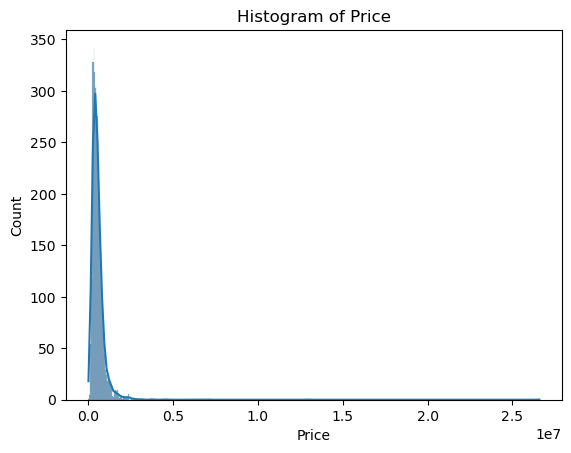

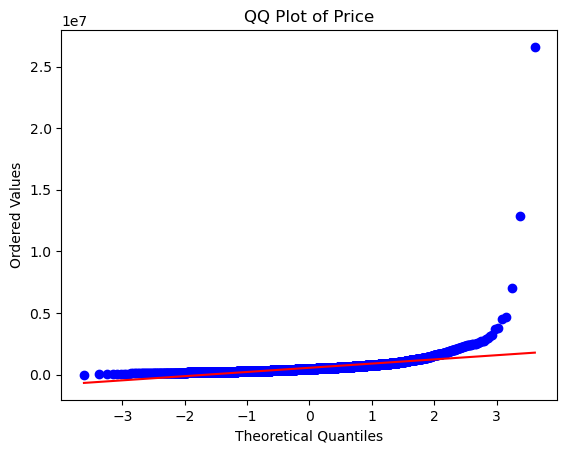

In [41]:
import scipy.stats as stats

sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.title('Histogram of Price')

# Creating the QQ plot
plt.figure()
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Price')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [42]:
#the above graphs represent the Q-Q plot and histogram for df['price'], it does follow a normal distribution

In [43]:
df.date = pd.to_datetime(df.date)

In [44]:
# Extract day from the date column to calcuate on which days of the month is a home purchase more likely 
df['day'] = df['date'].dt.day
df.head(1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02  313000.0         3        1.5         1340      7912     1.5   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   

   yr_renovated       city  statezip  day  
0          2005  Shoreline  WA 98133    2

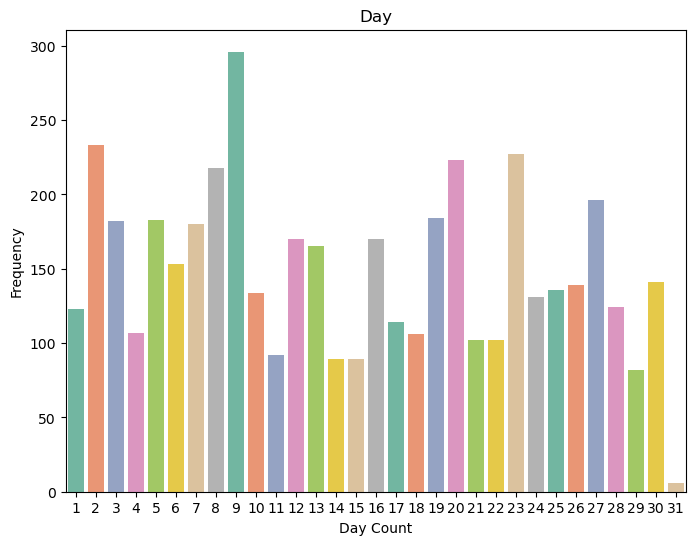

In [45]:
data = df['day'].value_counts().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='index', y='day', data=data,palette='Set2')
plt.xlabel('Day Count')
plt.ylabel('Frequency')
plt.title('Day')
plt.show()

In [46]:
#The above graph shows us on whch days a customer is most likey to buy a home with the first 9 days having a higher average of
#buyers than the remaining days.

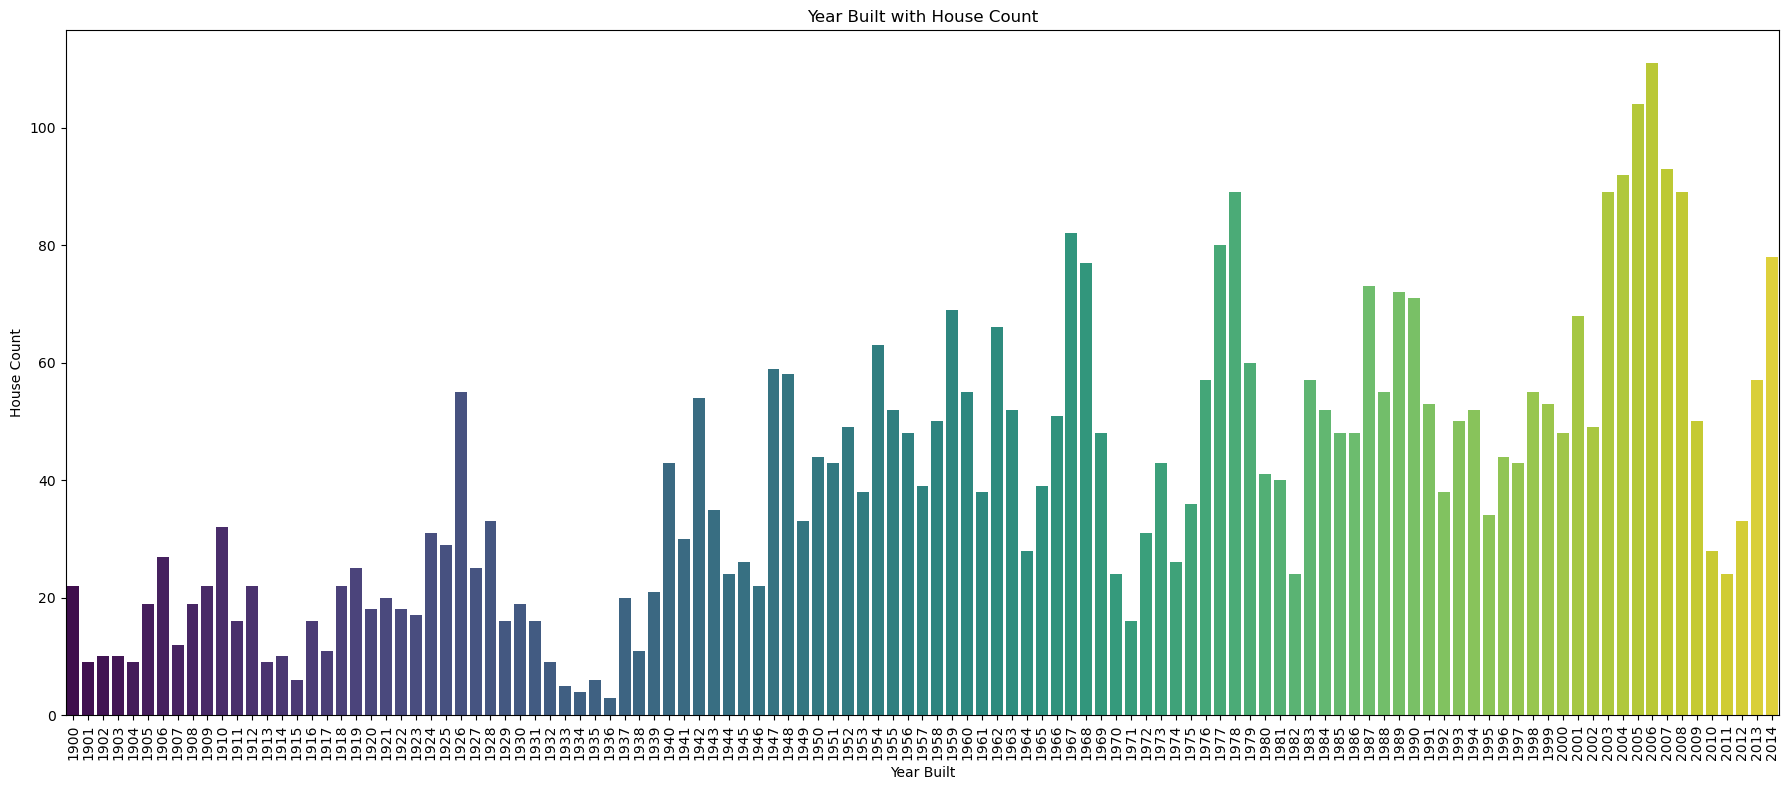

In [47]:
plt.figure(figsize=(18, 8))
sns.countplot(x='yr_built', data=df, palette='viridis')
plt.xlabel('Year Built')
plt.ylabel('House Count')
plt.title('Year Built with House Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [48]:
#The graph shows an indepth analysis on the home constructions, where 2000-2009 is when most of the homes where constructed

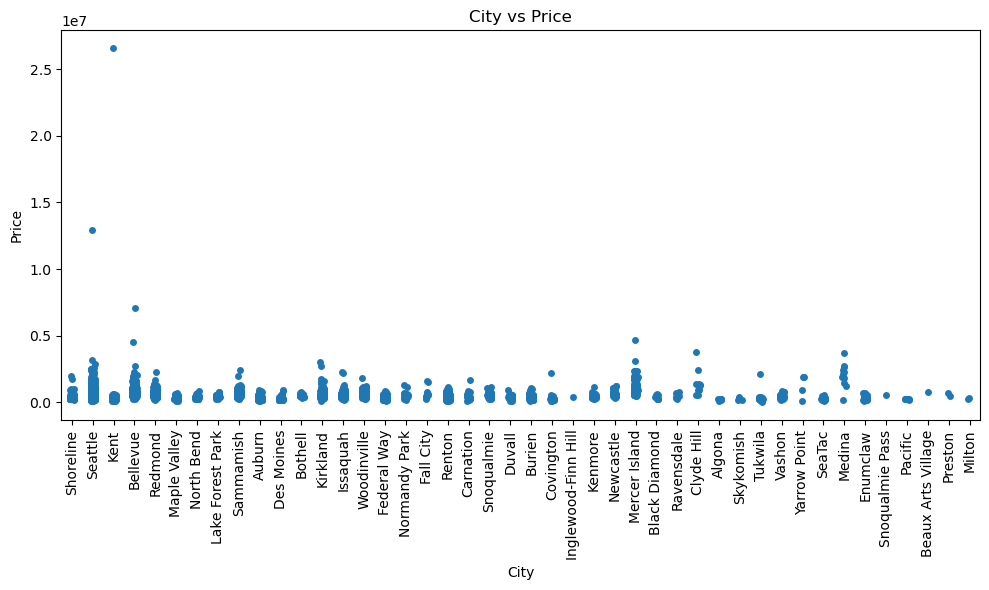

In [50]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='city', y='price', data=df, jitter=True)
plt.xlabel('City')
plt.ylabel('Price')
plt.title('City vs Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [51]:
# Assuming df is your DataFrame with 'city' and 'price' columns
fig = px.strip(df, x='city', y='price', title='City vs Price', labels={'price': 'Price'}, category_orders={'city': sorted(df['city'].unique())})
fig.update_traces(marker=dict(size=4, opacity=0.5))
fig.update_layout(xaxis_title='City', yaxis_title='Price')
fig.update_xaxes(tickangle=45)

fig.show()

In [45]:
#In this graph Bellevue and Seattle seem to have a few outliers in prices and also Mercer Island and Medina which are high-erener
#places

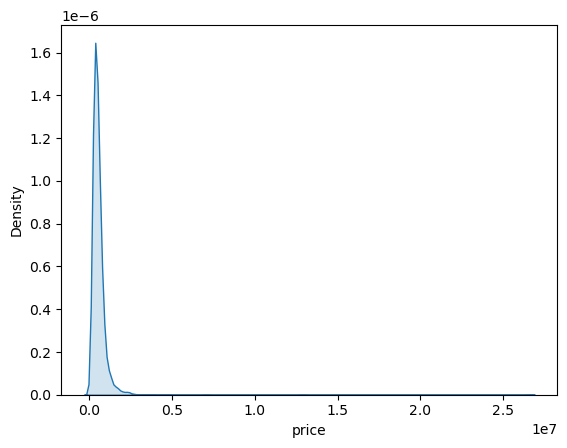

In [46]:
sns.kdeplot(data=df['price'], fill=True, alpha=0.2)
#ax1.set_xlabel('Price')
#ax1.set_ylabel('Density')
#ax1.set_title('Price Distribution')
plt.show()

In [47]:
#outliers are present in the price distribution

In [48]:
#Removing state from statezip
df['zipcode'] = df['statezip'].str.split(' ').str[-1]

<Figure size 2500x500 with 0 Axes>

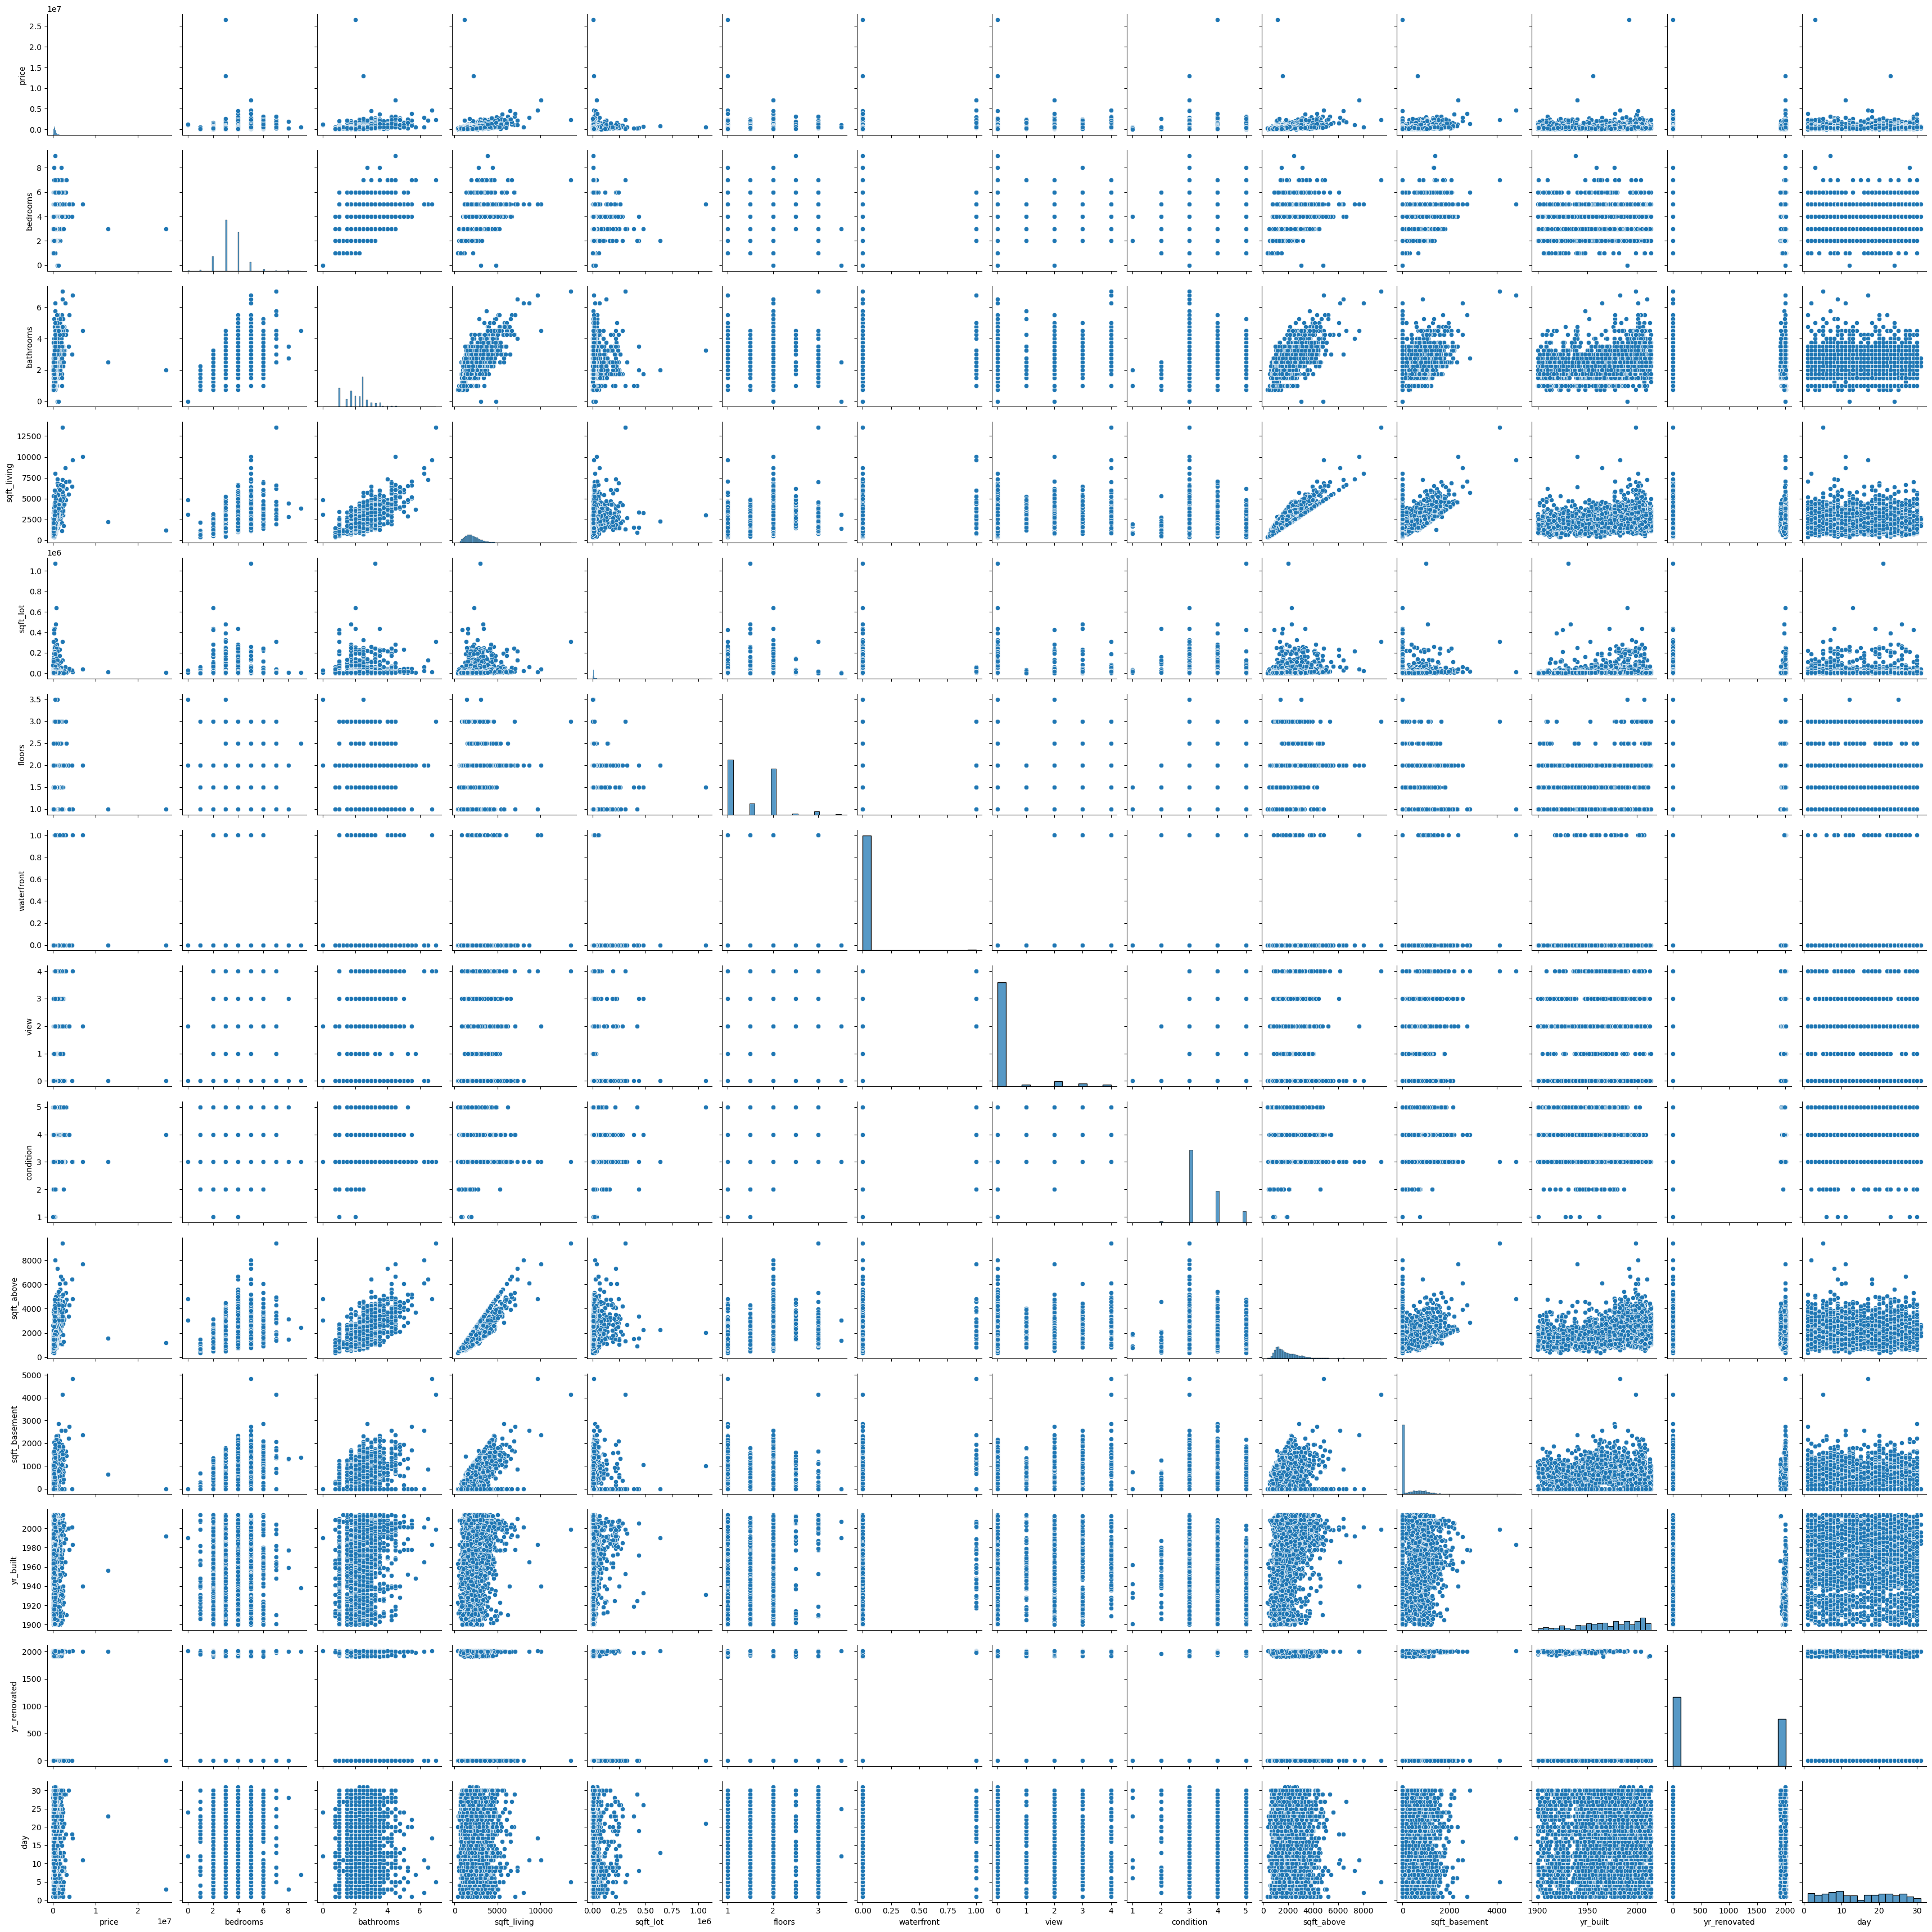

In [49]:
#Pairplot
plt.figure(figsize=(25, 5))
sns.pairplot(df)
plt.show()

In [50]:
df.head(1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02  313000.0         3        1.5         1340      7912     1.5   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   

   yr_renovated       city  statezip  day zipcode  
0          2005  Shoreline  WA 98133    2   98133

In [51]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip', 'day',
       'zipcode'],
      dtype='object')

In [52]:
#Dropping columns not required for modelling
df2 = df.drop(['date','sqft_lot','waterfront','view', 'condition','sqft_above','sqft_basement','yr_renovated'
               ,'statezip','day','zipcode'],axis='columns')
df2.shape

(4597, 7)

In [53]:
df2.head(1)

price  bedrooms  bathrooms  sqft_living  floors  yr_built       city
0  313000.0         3        1.5         1340     1.5      1955  Shoreline

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        4597 non-null   float64
 1   bedrooms     4597 non-null   int64  
 2   bathrooms    4597 non-null   float64
 3   sqft_living  4597 non-null   int64  
 4   floors       4597 non-null   float64
 5   yr_built     4597 non-null   int64  
 6   city         4597 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 251.5+ KB


In [55]:
#The dataset covers an area of 77 different zipcodes
#df.zipcode.value_counts().count()

In [56]:
#Spliting into numerical and categorical datasets
#categorical_columns = df.select_dtypes(include=['object', 'category']).columns
#categorical_df = df[categorical_columns]
#print(categorical_df.head(2))
#num_df = df.drop(columns=categorical_columns)
#print(num_df.head(2))

In [57]:
#Changing into float:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [58]:
df2[~df2['sqft_living'].apply(is_float)]

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, floors, yr_built, city]
Index: []

In [59]:
per_new = df2.copy()

In [60]:
#Finding how many homes are located in each city
per_new.location = per_new.city.apply(lambda x: x.strip())
city_count=per_new['city'].value_counts(ascending=False)
city_count

C:\Users\joshu\AppData\Local\Temp\ipykernel_3904\3338527448.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             147
Shoreline               122
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               57
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [61]:
#Considering all the cities
city_count_total = city_count[city_count<=1600]
city_count_total

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             147
Shoreline               122
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               57
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [62]:
#Outlier Treatment

In [63]:
per_new[per_new.sqft_living/per_new.bedrooms<450].head()

price  bedrooms  bathrooms  sqft_living  floors  yr_built       city
0   313000.0         3        1.5         1340     1.5      1955  Shoreline
5   490000.0         2        1.0          880     1.0      1938    Seattle
9   640000.0         4        2.0         1520     1.5      1945    Seattle
13  365000.0         3        1.0         1090     1.0      1955    Seattle
15  242500.0         3        1.5         1200     1.0      1965       Kent

In [64]:
per_new.shape

(4597, 7)

In [65]:
#Removing any rows where bedrooms are less than 450 square feet
per_new2 = per_new[~(per_new.sqft_living/per_new.bedrooms<450)]
per_new2.shape

(3723, 7)

In [66]:
#Visualizing the outliers

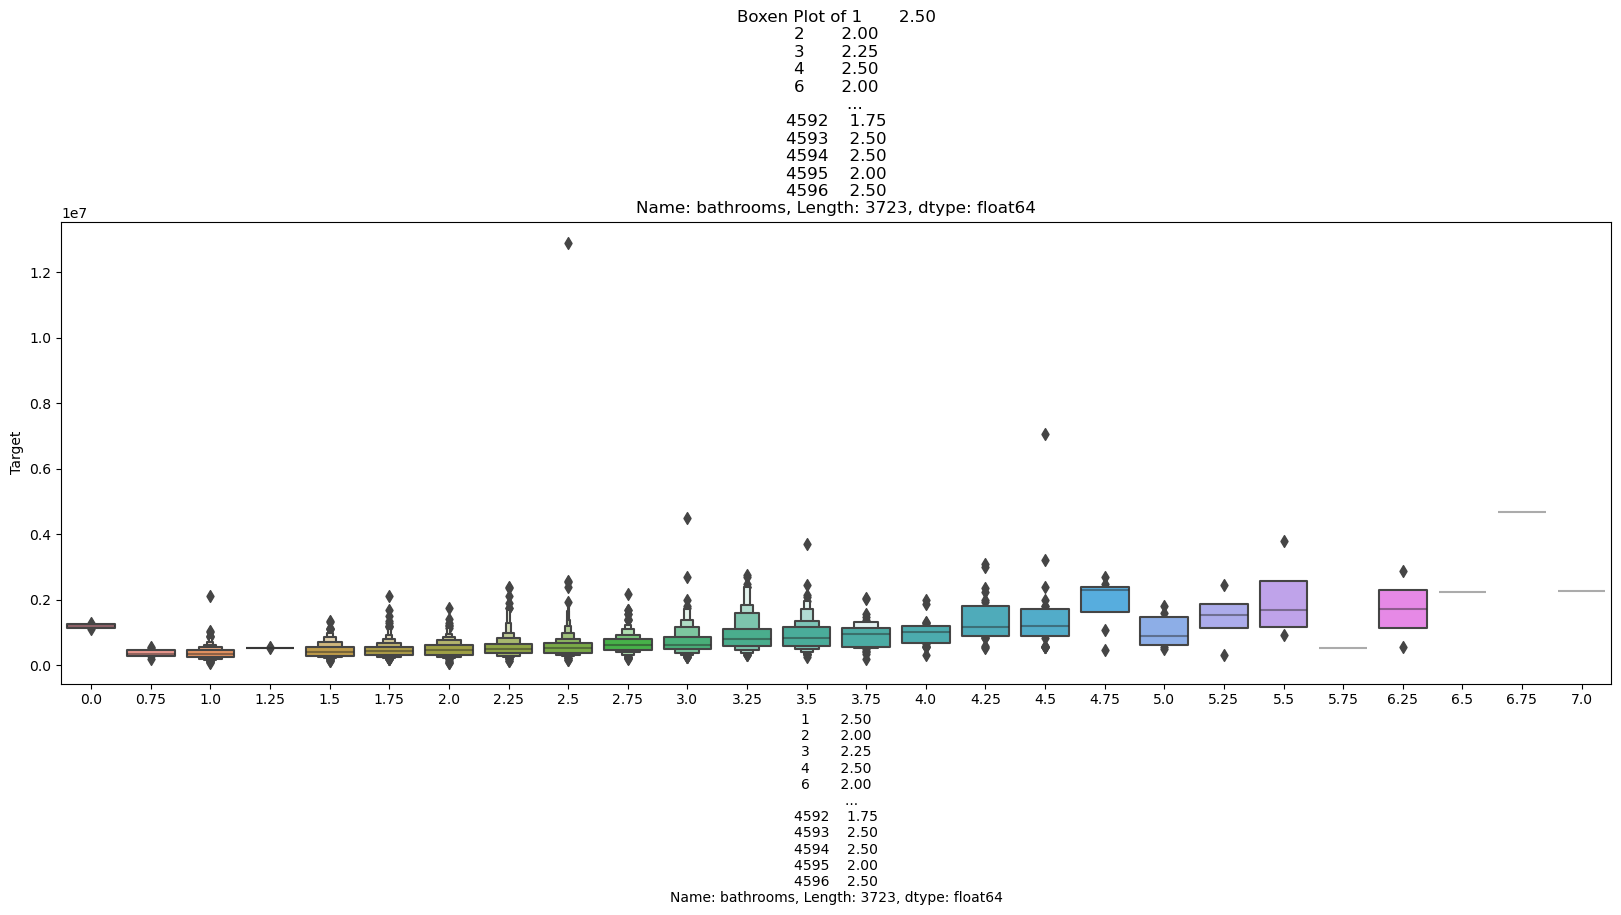

In [67]:
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')

sns.boxenplot(x=per_new2['bathrooms'], y=per_new2['price'])
plt.title('Boxen Plot of ' + str(per_new2['bathrooms']))
plt.xlabel(str(per_new2['bathrooms']))
plt.ylabel('Target')

plt.show()

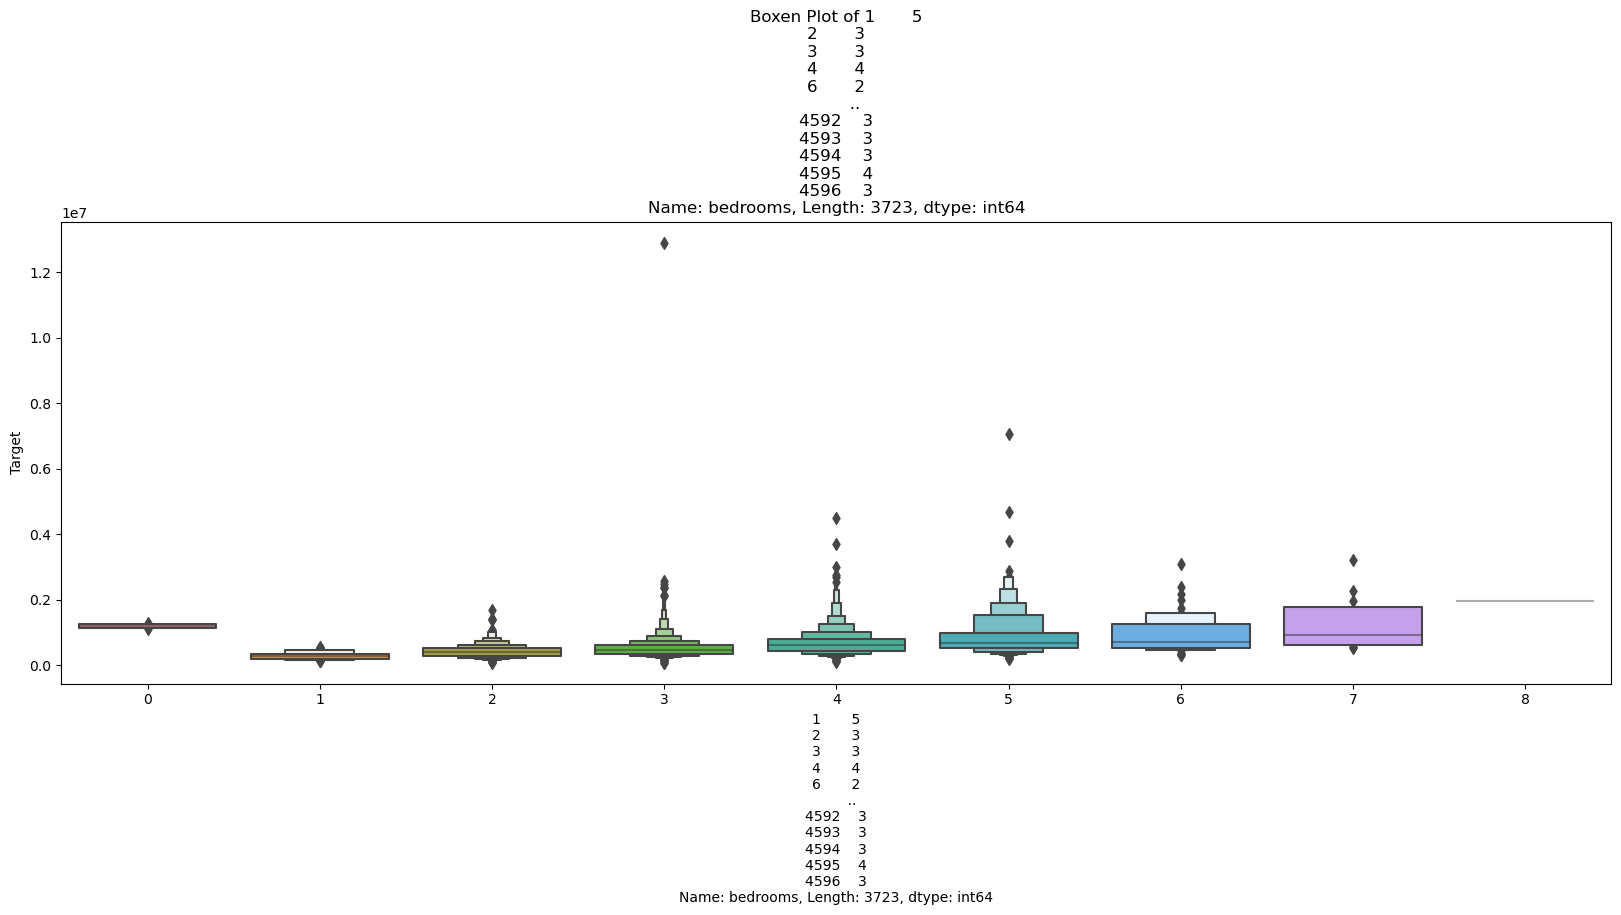

In [68]:
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')

sns.boxenplot(x=per_new2['bedrooms'], y=per_new2['price'])
plt.title('Boxen Plot of ' + str(per_new2['bedrooms']))
plt.xlabel(str(per_new2['bedrooms']))
plt.ylabel('Target')

plt.show()

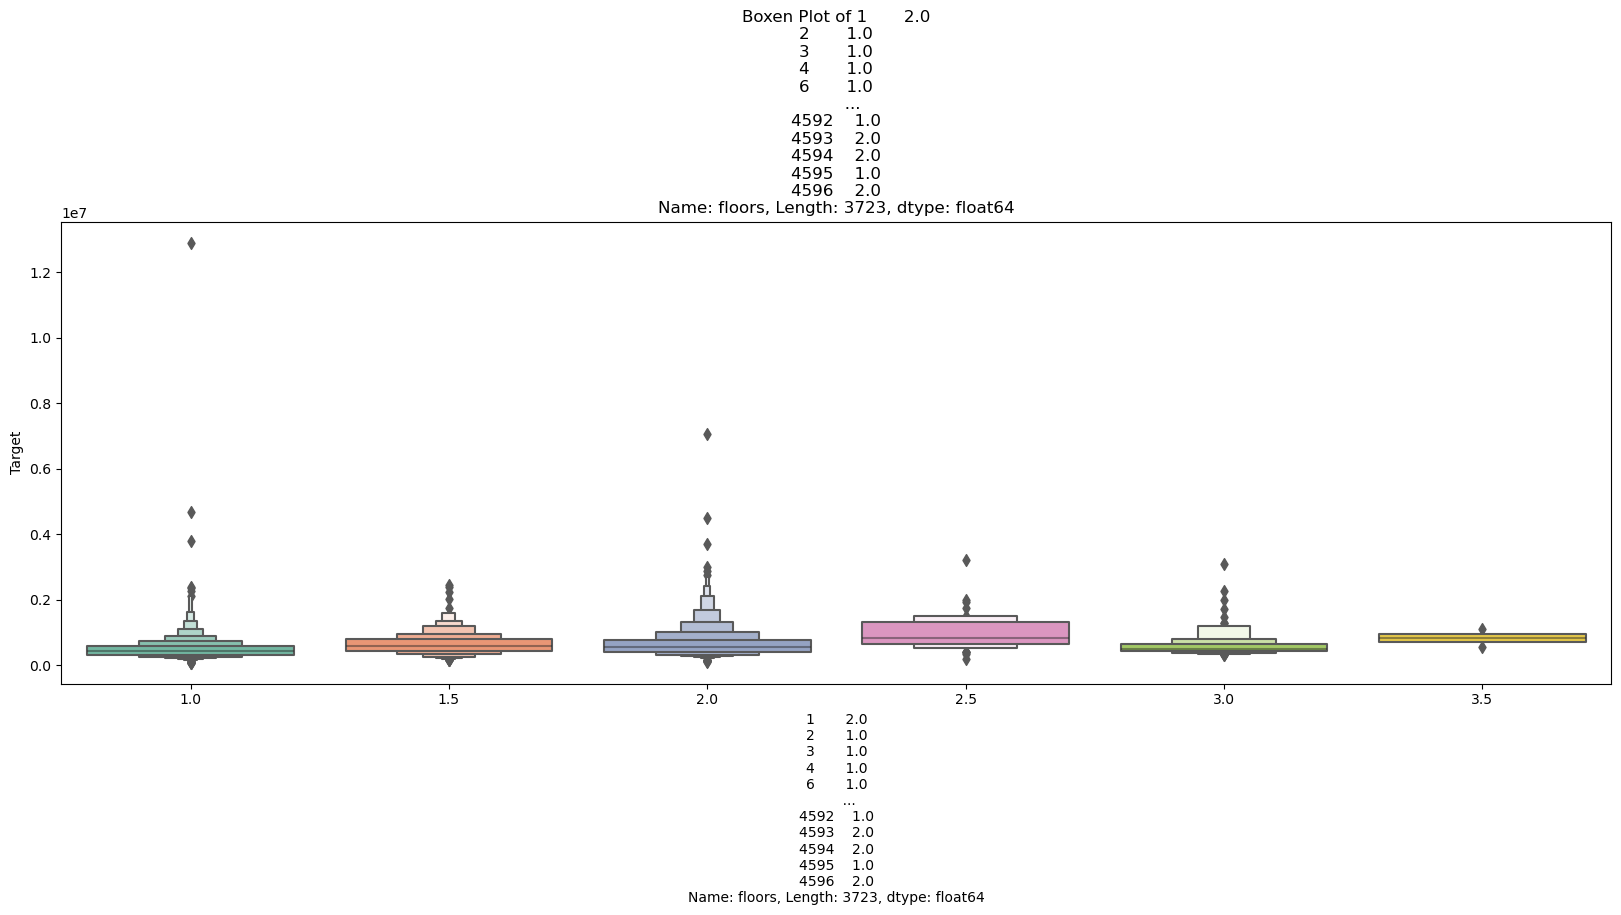

In [69]:
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')

sns.boxenplot(x=per_new2['floors'], y=per_new2['price'])
plt.title('Boxen Plot of ' + str(per_new2['floors']))
plt.xlabel(str(per_new2['floors']))
plt.ylabel('Target')

plt.show()

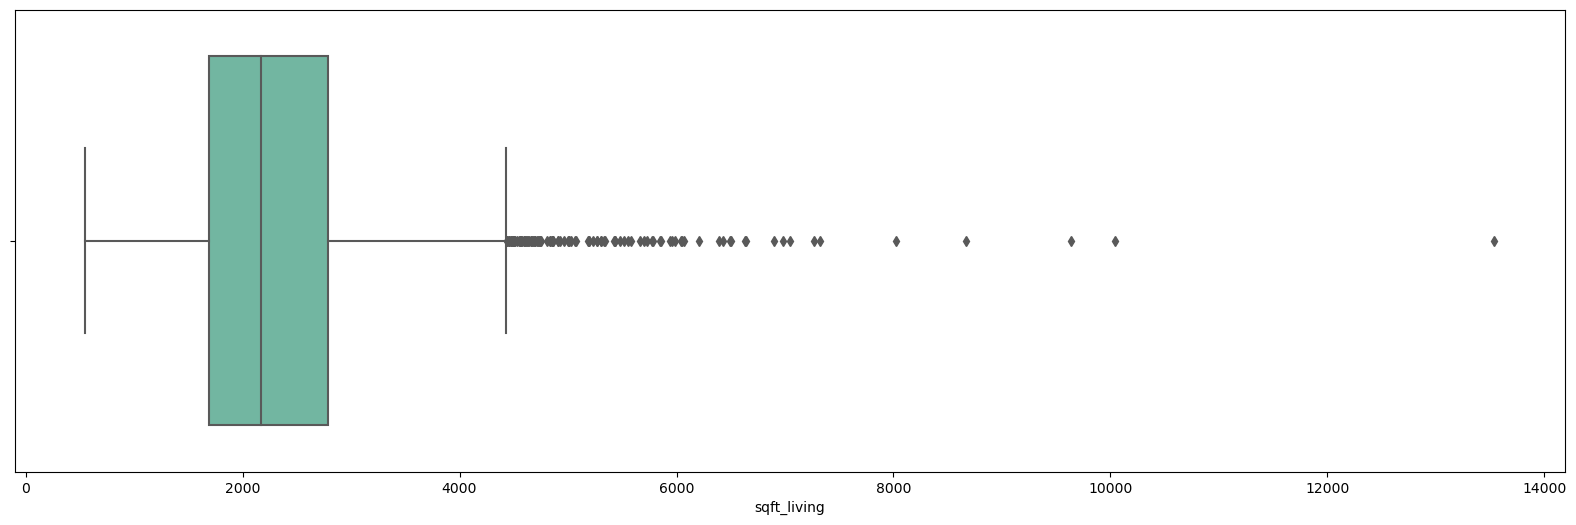

In [70]:
plt.figure(figsize=(20, 6))
sns.set_palette('Set2')

sns.boxplot(x=per_new2['sqft_living'])

plt.show()

In [71]:
#From the above graphs for bedrooms, bathrooms, floors, sqft living all have outliers but majority of the 
#data is within the outliers so it is not wise to remove them all.

In [72]:
#Function to remove outliers
def outlier_iqr(per_new2, column): 
    Q1 = per_new2[column].quantile(0.25)
    Q3 = per_new2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_iqr = per_new2[(per_new2[column] >= lower_bound) & (per_new2[column] <= upper_bound)]
    return df_iqr    

In [73]:
outlier_iqr(per_new2,'bedrooms')

price  bedrooms  bathrooms  sqft_living  floors  yr_built  \
1     2.384000e+06         5       2.50         3650     2.0      1921   
2     3.420000e+05         3       2.00         1930     1.0      1966   
3     4.200000e+05         3       2.25         2000     1.0      1963   
4     5.500000e+05         4       2.50         1940     1.0      1976   
6     3.350000e+05         2       2.00         1350     1.0      1976   
...            ...       ...        ...          ...     ...       ...   
4592  3.081667e+05         3       1.75         1510     1.0      1954   
4593  5.343333e+05         3       2.50         1460     2.0      1983   
4594  4.169042e+05         3       2.50         3010     2.0      2009   
4595  2.034000e+05         4       2.00         2090     1.0      1974   
4596  2.206000e+05         3       2.50         1490     2.0      1990   

           city  
1       Seattle  
2          Kent  
3      Bellevue  
4       Redmond  
6       Redmond  
...         ...  
4592    Seattle  
4593   Bellevue  
4594     Renton  
4595    Seattle  
4596  Covington  

[3634 rows x 7 columns]

In [74]:
temp_final = per_new2.drop(['yr_built'],axis='columns')
temp_final.head(3)

price  bedrooms  bathrooms  sqft_living  floors      city
1  2384000.0         5       2.50         3650     2.0   Seattle
2   342000.0         3       2.00         1930     1.0      Kent
3   420000.0         3       2.25         2000     1.0  Bellevue

In [75]:
#categorical encoding using one hot encoding 

In [76]:
one_hot_dum = pd.get_dummies(temp_final.city)
one_hot_dum.head(3)

Algona  Auburn  Beaux Arts Village  Bellevue  Black Diamond  Bothell  \
1       0       0                   0         0              0        0   
2       0       0                   0         0              0        0   
3       0       0                   0         1              0        0   

   Burien  Carnation  Clyde Hill  Covington  ...  SeaTac  Seattle  Shoreline  \
1       0          0           0          0  ...       0        1          0   
2       0          0           0          0  ...       0        0          0   
3       0          0           0          0  ...       0        0          0   

   Skykomish  Snoqualmie  Snoqualmie Pass  Tukwila  Vashon  Woodinville  \
1          0           0                0        0       0            0   
2          0           0                0        0       0            0   
3          0           0                0        0       0            0   

   Yarrow Point  
1             0  
2             0  
3             0  

[3 rows x 43 columns]

In [77]:
temp_final.head(2)

price  bedrooms  bathrooms  sqft_living  floors     city
1  2384000.0         5        2.5         3650     2.0  Seattle
2   342000.0         3        2.0         1930     1.0     Kent

In [78]:
#Adding the encoded columns into the main dataset
afinal = pd.concat([temp_final,one_hot_dum],axis='columns')
afinal.head()

price  bedrooms  bathrooms  sqft_living  floors      city  Algona  \
1  2384000.0         5       2.50         3650     2.0   Seattle       0   
2   342000.0         3       2.00         1930     1.0      Kent       0   
3   420000.0         3       2.25         2000     1.0  Bellevue       0   
4   550000.0         4       2.50         1940     1.0   Redmond       0   
6   335000.0         2       2.00         1350     1.0   Redmond       0   

   Auburn  Beaux Arts Village  Bellevue  ...  SeaTac  Seattle  Shoreline  \
1       0                   0         0  ...       0        1          0   
2       0                   0         0  ...       0        0          0   
3       0                   0         1  ...       0        0          0   
4       0                   0         0  ...       0        0          0   
6       0                   0         0  ...       0        0          0   

   Skykomish  Snoqualmie  Snoqualmie Pass  Tukwila  Vashon  Woodinville  \
1          0           0                0        0       0            0   
2          0           0                0        0       0            0   
3          0           0                0        0       0            0   
4          0           0                0        0       0            0   
6          0           0                0        0       0            0   

   Yarrow Point  
1             0  
2             0  
3             0  
4             0  
6             0  

[5 rows x 49 columns]

In [79]:
final_data = afinal.drop('city',axis='columns')
final_data.head(5)

price  bedrooms  bathrooms  sqft_living  floors  Algona  Auburn  \
1  2384000.0         5       2.50         3650     2.0       0       0   
2   342000.0         3       2.00         1930     1.0       0       0   
3   420000.0         3       2.25         2000     1.0       0       0   
4   550000.0         4       2.50         1940     1.0       0       0   
6   335000.0         2       2.00         1350     1.0       0       0   

   Beaux Arts Village  Bellevue  Black Diamond  ...  SeaTac  Seattle  \
1                   0         0              0  ...       0        1   
2                   0         0              0  ...       0        0   
3                   0         1              0  ...       0        0   
4                   0         0              0  ...       0        0   
6                   0         0              0  ...       0        0   

   Shoreline  Skykomish  Snoqualmie  Snoqualmie Pass  Tukwila  Vashon  \
1          0          0           0                0        0       0   
2          0          0           0                0        0       0   
3          0          0           0                0        0       0   
4          0          0           0                0        0       0   
6          0          0           0                0        0       0   

   Woodinville  Yarrow Point  
1            0             0  
2            0             0  
3            0             0  
4            0             0  
6            0             0  

[5 rows x 48 columns]

In [80]:
fin_data = final_data.drop(['price'],axis='columns')
fin_data.head(3)

bedrooms  bathrooms  sqft_living  floors  Algona  Auburn  \
1         5       2.50         3650     2.0       0       0   
2         3       2.00         1930     1.0       0       0   
3         3       2.25         2000     1.0       0       0   

   Beaux Arts Village  Bellevue  Black Diamond  Bothell  ...  SeaTac  Seattle  \
1                   0         0              0        0  ...       0        1   
2                   0         0              0        0  ...       0        0   
3                   0         1              0        0  ...       0        0   

   Shoreline  Skykomish  Snoqualmie  Snoqualmie Pass  Tukwila  Vashon  \
1          0          0           0                0        0       0   
2          0          0           0                0        0       0   
3          0          0           0                0        0       0   

   Woodinville  Yarrow Point  
1            0             0  
2            0             0  
3            0             0  

[3 rows x 47 columns]

In [81]:
#Splitting into input and output
inp=fin_data
out=final_data.price

In [82]:
#Model building
#Inital OLS model
import statsmodels.api as sm
inpc=sm.add_constant(inp)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     79.27
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:18:09   Log-Likelihood:                -52331.
No. Observations:                3723   AIC:                         1.048e+05
Df Residuals:                    3676   BIC:                         1.050e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.699e+04   2.86e+04      1.293      0.196   -1.91e+04    9.31e+04
bedrooms           -5.337e+04   7781.330     -6.859      0.000   -6.86e+04   -3.81e+04
bathrooms           2.743e+04    1.1e+04      2.483      0.013    5767.888    4.91e+04
sqft_living          275.1420      8.819     31.199      0.000     257.851     292.433
floors              6016.3425    1.1e+04      0.547      0.584   -1.55e+04    2.76e+04
Algona              -1.62e+05   1.37e+05     -1.187      0.235    -4.3e+05    1.06e+05
Auburn             -2.141e+05   3.16e+04     -6.769      0.000   -2.76e+05   -1.52e+05
Beaux Arts Village  4.041e+05   3.03e+05      1.333      0.183    -1.9e+05    9.99e+05
Bellevue            2.044e+05   2.62e+04      7.798      0.000    1.53e+05    2.56e+05
Black Diamond      -7.701e+04   1.16e+05     -0.665      0.506   -3.04e+05     1.5e+05
Bothell            -8.531e+04   5.71e+04     -1.494      0.135   -1.97e+05    2.67e+04
Burien             -7.538e+04   4.62e+04     -1.630      0.103   -1.66e+05    1.53e+04
Carnation          -1.054e+05   7.16e+04     -1.471      0.141   -2.46e+05    3.51e+04
Clyde Hill          5.346e+05   9.34e+04      5.724      0.000    3.51e+05    7.18e+05
Covington          -1.967e+05   5.71e+04     -3.446      0.001   -3.09e+05   -8.48e+04
Des Moines         -1.399e+05   4.94e+04     -2.834      0.005   -2.37e+05   -4.31e+04
Duvall             -1.325e+05   5.27e+04     -2.512      0.012   -2.36e+05   -2.91e+04
Enumclaw            -1.47e+05   6.83e+04     -2.152      0.031   -2.81e+05    -1.3e+04
Fall City          -1.398e+04   9.74e+04     -0.144      0.886   -2.05e+05    1.77e+05
Federal Way        -2.237e+05   3.34e+04     -6.702      0.000   -2.89e+05   -1.58e+05
Issaquah           -1.229e+04   2.89e+04     -0.426      0.670   -6.89e+04    4.43e+04
Kenmore            -6.968e+04   4.47e+04     -1.558      0.119   -1.57e+05     1.8e+04
Kent               -1.896e+05      3e+04     -6.326      0.000   -2.48e+05   -1.31e+05
Kirkland            1.046e+05   2.97e+04      3.521      0.000    4.64e+04    1.63e+05
Lake Forest Park   -6.681e+04   5.63e+04     -1.186      0.236   -1.77e+05    4.36e+04
Maple Valley       -1.692e+05   3.72e+04     -4.547      0.000   -2.42e+05   -9.63e+04
Medina              1.005e+06   9.35e+04     10.751      0.000    8.22e+05    1.19e+06
Mercer Island       3.432e+05   3.78e+04      9.084      0.000    2.69e+05    4.17e+05
Milton              1.217e+04   3.03e+05      0.040      0.968   -5.82e+05    6.07e+05
Newcastle          -4341.6625    5.9e+04     -0.074      0.941    -1.2e+05    1.11e+05
Normandy Park       3.338e+04   8.29e+04      0.403      0.687   -1.29e+05    1.96e+05
North Bend         -1.163e+05   5.09e+04     -2.284      0.022   -2.16e+05   -1.65e+04
Pacific            -1.473e+05   1.76e+

In [83]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame() 
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])] 
vif['Features']=inp.columns 
vif.sort_values('VIF',ascending=False)

VIF            Features
38  7.246117             Seattle
2   2.695874         sqft_living
7   2.635358            Bellevue
1   2.624986           bathrooms
35  2.421103              Renton
34  2.268356             Redmond
19  2.213941            Issaquah
36  2.196424           Sammamish
22  1.952144            Kirkland
21  1.936355                Kent
0   1.865158            bedrooms
5   1.762724              Auburn
18  1.655225         Federal Way
45  1.652575         Woodinville
26  1.648825       Mercer Island
24  1.591860        Maple Valley
41  1.485176          Snoqualmie
39  1.406416           Shoreline
3   1.347135              floors
20  1.326877             Kenmore
10  1.248766              Burien
30  1.241514          North Bend
15  1.230576              Duvall
28  1.216114           Newcastle
9   1.193321             Bothell
14  1.191455          Des Moines
23  1.186022    Lake Forest Park
13  1.168407           Covington
44  1.110428              Vashon
11  1.101735           Carnation
16  1.094236            Enumclaw
25  1.092752              Medina
43  1.092093             Tukwila
37  1.084456              SeaTac
12  1.080693          Clyde Hill
29  1.079281       Normandy Park
17  1.062014           Fall City
8   1.038658       Black Diamond
33  1.038297          Ravensdale
46  1.032095        Yarrow Point
4   1.026209              Algona
31  1.013869             Pacific
32  1.009535             Preston
40  1.009413           Skykomish
42  1.006789     Snoqualmie Pass
27  1.004213              Milton
6   1.004081  Beaux Arts Village

import scipy.stats as stats
box_out,lam=stats.boxcox(out)

In [84]:
#pip install mlxtend

In [85]:
#Linear Regression with RFE, backward and forward elimination

In [86]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [87]:
lr=LinearRegression()

In [88]:
#backward elimination:
backward=sfs(estimator=lr,k_features=6,forward=False,scoring='r2')
sfs_backward=backward.fit(inp,out)
sfs_backward

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(6, 6), scoring='r2')

In [89]:
feat_back=sfs_backward.k_feature_names_
feat_back


('sqft_living', 'Auburn', 'Federal Way', 'Kent', 'Medina', 'Renton')

In [90]:
sfs_backward.k_score_

0.4786182509346104

In [91]:
#forward selection:
forward=sfs(estimator=lr,k_features=6,forward=True,scoring='r2')
sfs_forward=forward.fit(inp,out)
feat_for=sfs_forward.k_feature_names_
print(feat_for)
sfs_forward.k_score_

('sqft_living', 'Bellevue', 'Kirkland', 'Medina', 'Mercer Island', 'Seattle')


0.5225452923889548

In [92]:
#Recursive expression

In [93]:
from sklearn.feature_selection import RFECV

In [94]:
rfe=RFECV(estimator=lr)
rfe_mod=rfe.fit(inp,out)

In [95]:
rfe_mod.ranking_
# 1-means feature is in final subset
#2- means feature is not included or less sognificant

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [96]:
#Final Model building using simple linear regression and random forest

In [97]:
#100 data
#70 train
#30 test

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp,out,test_size=0.2,random_state=10)

In [99]:
from sklearn.feature_selection import RFECV
lr=LinearRegression()
rfe=RFECV(estimator=lr)
rfe_mod=rfe.fit(X_train,y_train)

In [100]:
rfe_mod.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [101]:
rank=pd.DataFrame()

In [102]:
rank['Features']=X_train.columns 
rank['RANK']=rfe_mod.ranking_ 
rank

Features  RANK
0             bedrooms     1
1            bathrooms     1
2          sqft_living     1
3               floors     1
4               Algona     1
5               Auburn     1
6   Beaux Arts Village     1
7             Bellevue     1
8        Black Diamond     1
9              Bothell     1
10              Burien     1
11           Carnation     1
12          Clyde Hill     1
13           Covington     1
14          Des Moines     1
15              Duvall     1
16            Enumclaw     1
17           Fall City     1
18         Federal Way     1
19            Issaquah     1
20             Kenmore     1
21                Kent     1
22            Kirkland     1
23    Lake Forest Park     1
24        Maple Valley     1
25              Medina     1
26       Mercer Island     1
27              Milton     1
28           Newcastle     1
29       Normandy Park     1
30          North Bend     1
31             Pacific     1
32             Preston     1
33          Ravensdale     1
34             Redmond     1
35              Renton     1
36           Sammamish     1
37              SeaTac     1
38             Seattle     1
39           Shoreline     1
40           Skykomish     1
41          Snoqualmie     1
42     Snoqualmie Pass     1
43             Tukwila     1
44              Vashon     1
45         Woodinville     1
46        Yarrow Point     1

In [103]:
feat_rfe=rank[rank['RANK']==1]['Features']
feat_rfe

0               bedrooms
1              bathrooms
2            sqft_living
3                 floors
4                 Algona
5                 Auburn
6     Beaux Arts Village
7               Bellevue
8          Black Diamond
9                Bothell
10                Burien
11             Carnation
12            Clyde Hill
13             Covington
14            Des Moines
15                Duvall
16              Enumclaw
17             Fall City
18           Federal Way
19              Issaquah
20               Kenmore
21                  Kent
22              Kirkland
23      Lake Forest Park
24          Maple Valley
25                Medina
26         Mercer Island
27                Milton
28             Newcastle
29         Normandy Park
30            North Bend
31               Pacific
32               Preston
33            Ravensdale
34               Redmond
35                Renton
36             Sammamish
37                SeaTac
38               Seattle
39             Shoreline


In [104]:
#backward selection
lr=LinearRegression()
backward=sfs(estimator=lr,k_features='best',forward=False,scoring='r2')
sfs_backward=backward.fit(X_train,y_train)
feat_back=sfs_backward.k_feature_names_
print(feat_back)
sfs_backward.k_score_

('bedrooms', 'sqft_living', 'floors', 'Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue', 'Bothell', 'Burien', 'Carnation', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Federal Way', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island', 'Milton', 'North Bend', 'Redmond', 'Renton', 'SeaTac', 'Seattle', 'Snoqualmie', 'Tukwila', 'Woodinville', 'Yarrow Point')


0.5359550439567071

In [105]:
#forward selection:
forward=sfs(estimator=lr,k_features='best',forward=True,scoring='r2')
sfs_forward=forward.fit(X_train,y_train)
feat_for=sfs_forward.k_feature_names_
print(feat_for)
sfs_forward.k_score_

('bedrooms', 'bathrooms', 'sqft_living', 'Algona', 'Auburn', 'Bellevue', 'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Federal Way', 'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Yarrow Point')


0.5360514776165785

In [106]:
feat_back=list(feat_back)
feat_for=list(feat_for)
feat_rfe=list(feat_rfe)

In [107]:
from sklearn.metrics import r2_score,mean_squared_error

In [108]:
lr=LinearRegression()
lr.fit(X_train[feat_back],y_train)
ypred=lr.predict(X_test[feat_back])
r2=r2_score(y_test,ypred)
rmse=np.sqrt(mean_squared_error(y_test,ypred))
res_back=[r2,rmse]

In [109]:
res_back

[0.5630207684714867, 266581.5079549057]

In [110]:
lr=LinearRegression()
lr.fit(X_train[feat_for],y_train)
ypred=lr.predict(X_test[feat_for])
r2=r2_score(y_test,ypred)
rmse=np.sqrt(mean_squared_error(y_test,ypred))
res_for=[r2,rmse]

In [111]:
res_for

[0.5781391191916327, 261929.40085808752]

In [112]:
lr=LinearRegression()
lr.fit(X_train[feat_rfe],y_train)
ypred=lr.predict(X_test[feat_rfe])
r2=r2_score(y_test,ypred)
rmse=np.sqrt(mean_squared_error(y_test,ypred))
res_rfe=[r2,rmse]

In [113]:
res_rfe

[0.5783659925859249, 261858.95962184452]

In [114]:
score_card=pd.DataFrame()

In [115]:
score_card['Backward_Elimination']=res_back
score_card['Forward_Elimination']=res_for
score_card['RFE']=res_rfe
score_card.index=['Rsquare','RMSE']
score_card

Backward_Elimination  Forward_Elimination            RFE
Rsquare              0.563021             0.578139       0.578366
RMSE            266581.507955        261929.400858  261858.959622

In [116]:
from sklearn.linear_model import LinearRegression as lr
lr_mod = LinearRegression()
lr_mod.fit(X_train,y_train)
lr_mod.score(X_test,y_test)

0.5783659925859249

In [117]:
from sklearn.ensemble import RandomForestRegressor as rf
rf_mod = RandomForestRegressor()
rf_mod.fit(X_train,y_train)

RandomForestRegressor()

In [118]:
rf_mod.score(X_train,y_train)

0.9035270578223333

In [119]:
rf_mod.feature_importances_

array([3.18670102e-02, 6.01340143e-02, 6.67739903e-01, 2.40291489e-02,
       5.19645596e-05, 2.57717362e-03, 3.33912931e-04, 3.04544439e-02,
       7.41039721e-05, 3.56140008e-04, 7.42984217e-04, 4.29463558e-04,
       2.78187099e-03, 4.89278744e-04, 5.21302845e-04, 1.22221594e-04,
       1.21054365e-04, 2.91776949e-04, 4.10431544e-03, 4.28141046e-03,
       4.70742632e-04, 2.21682744e-03, 1.33420454e-02, 6.00839939e-04,
       1.00112239e-03, 1.79951704e-02, 1.79704258e-02, 0.00000000e+00,
       1.29332835e-03, 1.78773620e-03, 2.35868421e-04, 5.35403802e-05,
       4.59737128e-05, 7.82676180e-05, 8.62833201e-03, 1.82821325e-03,
       5.62048662e-03, 1.19005819e-04, 8.12804053e-02, 2.99493728e-03,
       2.39445894e-05, 1.04547264e-03, 2.18673628e-05, 2.85847609e-04,
       7.84665634e-04, 2.00577864e-03, 6.76566020e-03])

In [120]:
#Function to predict the price
def predict_price(city,bedrooms,bathrooms,sqft_living,floors):    
    loc_index = np.where(inp.columns==city)[0][0]

    x = np.zeros(len(inp.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = sqft_living
    x[3] = floors
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_mod.predict([x])[0]

In [124]:
predict_price('Seattle',2.0, 2.0,1000.0 ,2)

C:\Users\joshu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



429917.42344690766

In [129]:
import pickle

In [130]:
# Function to save the model using pickle
def save_model(model, filename="lr_mod.pkl"):
    with open(filename, "wb") as file:
        pickle.dump(model, file)

In [132]:
# Save the model 
save_model(lr_mod, "lr_mod.pkl")